In [1]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 KB 4.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 KB 7.2 MB/s eta 0:00:00


In [2]:
from pyvis.network import Network

In [3]:
!touch 'match.html'

# Get Started

## Add nodes

In [4]:
net = Network(notebook=True,   cdn_resources='in_line')
net.add_node(1, label="Alex")
net.add_node(2, label="Cathy")
# net.show("/content/drive/MyDrive/CL/s2s6/match.html")
net.save_graph("match.html")

In [5]:
from IPython.display import HTML
HTML(filename="match.html")

## Add a list of nodes

In [6]:
net = Network(notebook=True,  cdn_resources='in_line')
net.add_nodes([1, 2], label=["Alex", "Carthy"])
# net.show("/content/drive/MyDrive/CL/s2s6/match.html")
net.save_graph("match.html")

In [10]:
from IPython.display import HTML
HTML(filename="match.html")

In [9]:
net.add_nodes(
    [3, 4, 5, 6],
    label=["Michael", "Ben", "Oliver", "Olivia"],
    color=["#3da831", "#9a31a8", "#3155a8", "#eb4034"],
)
# net.show("list_of_nodes_with_color.html")
net.save_graph("match.html")

## Add edges

### Edges

In [ ]:
net = Network(notebook=True)

net.add_nodes(
    [1, 2, 3, 4, 5, 6],
    label=["Alex", "Cathy", "Michael", "Ben", "Oliver", "Olivia"],
    color=["#00bfff", "#ffc0cb", "#3da831", "#9a31a8", "#3155a8", "#eb4034"],
)

In [11]:
net.add_edge(1, 5)
net.add_edges([(2, 5), (3, 4), (1, 6), (2, 6), (3, 5)])
net.show("edges.html")

edges.html


### Edges with Weights

In [12]:
net = Network(notebook=True)

net.add_nodes(
    [1, 2, 3, 4, 5, 6],
    label=["Alex", "Cathy", "Michael", "Ben", "Oliver", "Olivia"],
    color=["#00bfff", "#ffc0cb", "#3da831", "#9a31a8", "#3155a8", "#eb4034"],
)

In [13]:
net.add_edge(1, 5, value=2)
net.add_edges([(2, 5, 5), (3, 4, 2), (1, 6), (2, 6), (3, 5)])

In [14]:
net.show("edges_with_weights.html")

edges_with_weights.html


### Edges with Repulsion

In [15]:
def add_repulsion(node_distance: int, spring_length: int):
    net = Network(notebook=True)

    net.add_nodes(
        [1, 2, 3, 4, 5, 6],
        label=["Alex", "Cathy", "Michael", "Ben", "Oliver", "Olivia"],
        color=["#00bfff", "#ffc0cb", "#3da831", "#9a31a8", "#3155a8", "#eb4034"],
    )

    net.add_edge(1, 5, value=2)
    net.add_edges([(2, 5, 5), (3, 4, 2), (1, 6), (2, 6), (3, 5)])

    net.repulsion(node_distance=node_distance, spring_length=spring_length)

    net.show(f"distance_{node_distance}_spring_length_{spring_length}.html")

    return net

In [16]:
net = add_repulsion(node_distance=100, spring_length=200)
net.show("distance_100_spring_length_200.html")

distance_100_spring_length_200.html
distance_100_spring_length_200.html


In [17]:
net = add_repulsion(node_distance=100, spring_length=1000)
net.show(f"distance_100_spring_length_1000.html")

distance_100_spring_length_1000.html
distance_100_spring_length_1000.html


In [18]:
net = add_repulsion(node_distance=500, spring_length=200)
net.show(f"distance_500_spring_length_200.html")

distance_500_spring_length_200.html
distance_500_spring_length_200.html


# Matching problem

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_excel("employer_matching.xlsx", index_col=0)
nodes = df.columns.to_list()
nodes = [node.strip() for node in nodes]
nodes

['Ben', 'Kate', 'Thinh', 'Jorge', 'Alfredo', 'Francisco', 'Olivia', 'Chris']

In [ ]:
def draw_network(
    nodes: list,
    df: pd.DataFrame,
    minium_weight: int = 0,
    repulsion: int = 100,
    spring_length=200,
    buttons=False,
):

    net = Network("500px", "500px", notebook=True,  cdn_resources='in_line' )
    net.add_nodes(nodes)

    # add edges
    for node, weights in df.iterrows():
        edges = get_edges(node, weights, nodes, minium_weight)
        net.add_edges(edges)

    # change node distance and spring length
    net.repulsion(repulsion, spring_length=spring_length)

    # Tweek configuration UI
    net.show_buttons(filter_=buttons)
    return net

In [ ]:
def get_edges(node: str, weights: list, all_nodes: list, minium_weight: int):

    nodes = all_nodes.copy()

    # Remove target node
    nodes.remove(node)

    # Create a list of edges with weights
    edges = [(node, connection, weight) for connection, weight in zip(nodes, weights)]

    # Get only edges with weights greater than the minimum weight
    edges = [edge for edge in edges if edge[2] >= minium_weight]

    return edges

In [ ]:
from IPython.display import HTML
HTML(filename="match.html")

In [ ]:
net = draw_network(nodes, df, minium_weight=9, repulsion=100, spring_length=500,)
net.save_graph("match.html")



In [ ]:
net = draw_network(
    nodes, df, minium_weight=0, repulsion=100, spring_length=500, buttons=["physics"]
)
net.save_graph("match.html")
# net.show("match_with_buttons.html")

In [ ]:
from IPython.display import HTML
HTML(filename="match.html")

In [ ]:
df

,Ben,Kate,Thinh,Jorge,Alfredo,Francisco,Olivia,Chris
Ben,0,0,3,3,7,9,3,5
Kate,2,0,7,6,8,8,1,6
Thinh,7,7,0,1,5,9,8,9
Jorge,4,3,0,0,5,0,2,3
Alfredo,8,1,3,3,0,7,0,1
Francisco,9,9,0,4,7,0,2,7
Olivia,2,0,0,4,5,5,0,8
Chris,4,1,4,9,8,1,1,0


In [19]:
# ToDo: загрузить датасет facebook и нарисовать из него граф из 100 записей (facebook_combined)

In [44]:
points = []
rows_amount = 500
with open('facebook_combined.txt' , 'r') as f:
    for i in f.read().split('\n')[:rows_amount]:
        point = map(int, i.split(' '))
        points.append(tuple(point))

len(points), points[:10]

(500,
 [(0, 1),
  (0, 2),
  (0, 3),
  (0, 4),
  (0, 5),
  (0, 6),
  (0, 7),
  (0, 8),
  (0, 9),
  (0, 10)])

In [46]:
leafs = []
for i in points:
  leafs.append(i[0])
  leafs.append(i[1])

leafs = set(leafs)
len(leafs), list(leafs)[:20]

(348, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [53]:
net = Network(notebook=True)

net.add_nodes(leafs)
net.add_edges(points)

net.repulsion(node_distance=150, spring_length=230)

net.show(f"match_test.html")

match_test.html


In [ ]:
from IPython.display import HTML
HTML(filename="match_test.html")

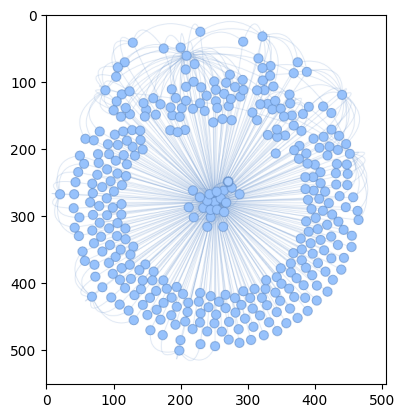

In [58]:
from PIL import Image
import matplotlib.pyplot as plt

plt.imshow(Image.open('pyvis.png'))